# Clean and Analyze Employee Exit Surveys

In this project, Ill work with exit surveys from employees of the Department of Education, Training and Employment (DETE) and the Technical and Further Education (TAFE) institute in Queensland, Australia. 

These data sets can be found at the following sources:
- https://data.gov.au/dataset/ds-qld-89970a3b-182b-41ea-aea2-6f9f17b5907e/details?q=exit%20survey
- https://data.gov.au/dataset/ds-qld-fe96ff30-d157-4a81-851d-215f2a0fe26d/details?q=exit%20survey

In this project, I will be looking to know the following:

- Are employees who only worked for the institutes for a short period of time resigning due to some kind of dissatisfaction? What about employees who have been there longer?
- Are younger employees resigning due to some kind of dissatisfaction? What about older employees?

To find these answers I will need to combine the results for both surveys. Although both used the same survey template, one of them customized some of the answers. Therefore we will need to do some data cleaning steps first.

In [1]:
import pandas as pd
import numpy as np
from IPython.display import display

In [2]:
date_survey = pd.read_csv('dete_survey.csv')

print('Info:')
display(date_survey.info())
print('\n')

print('First three columns:')
display(date_survey.head(3))
print('\n')

print('Sum of nulls:')
display(date_survey.isnull().sum())
print('\n')

print('Example values:')
display(date_survey['Region'].value_counts())

Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 822 entries, 0 to 821
Data columns (total 56 columns):
ID                                     822 non-null int64
SeparationType                         822 non-null object
Cease Date                             822 non-null object
DETE Start Date                        822 non-null object
Role Start Date                        822 non-null object
Position                               817 non-null object
Classification                         455 non-null object
Region                                 822 non-null object
Business Unit                          126 non-null object
Employment Status                      817 non-null object
Career move to public sector           822 non-null bool
Career move to private sector          822 non-null bool
Interpersonal conflicts                822 non-null bool
Job dissatisfaction                    822 non-null bool
Dissatisfaction with the department    822 non-null bool
Physical work e

None



First three columns:


,ID,SeparationType,Cease Date,DETE Start Date,Role Start Date,Position,Classification,Region,Business Unit,Employment Status,...,Kept informed,Wellness programs,Health & Safety,Gender,Age,Aboriginal,Torres Strait,South Sea,Disability,NESB
0,1,Ill Health Retirement,08/2012,1984,2004,Public Servant,A01-A04,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,Yes
1,2,Voluntary Early Retirement (VER),08/2012,Not Stated,Not Stated,Public Servant,AO5-AO7,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,NaN
2,3,Voluntary Early Retirement (VER),05/2012,2011,2011,Schools Officer,NaN,Central Office,Education Queensland,Permanent Full-time,...,N,N,N,Male,61 or older,NaN,NaN,NaN,NaN,NaN




Sum of nulls:


ID                                       0
SeparationType                           0
Cease Date                               0
DETE Start Date                          0
Role Start Date                          0
Position                                 5
Classification                         367
Region                                   0
Business Unit                          696
Employment Status                        5
Career move to public sector             0
Career move to private sector            0
Interpersonal conflicts                  0
Job dissatisfaction                      0
Dissatisfaction with the department      0
Physical work environment                0
Lack of recognition                      0
Lack of job security                     0
Work location                            0
Employment conditions                    0
Maternity/family                         0
Relocation                               0
Study/Travel                             0
Ill Health 



Example values:


Metropolitan                135
Central Office              130
South East                  108
Not Stated                  105
Darling Downs South West     95
Central Queensland           84
North Coast                  75
North Queensland             53
Far North Queensland         37
Name: Region, dtype: int64

In [3]:
tafe_survey = pd.read_csv('tafe_survey.csv')

print('Info:')
display(tafe_survey.info())
print('\n')

print('First three columns:')
display(tafe_survey.head(3))
print('\n')

print('Sum of nulls:')
display(tafe_survey.isnull().sum())

Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 702 entries, 0 to 701
Data columns (total 72 columns):
Record ID                                                                                                                                                        702 non-null float64
Institute                                                                                                                                                        702 non-null object
WorkArea                                                                                                                                                         702 non-null object
CESSATION YEAR                                                                                                                                                   695 non-null float64
Reason for ceasing employment                                                                                                                                    70

None



First three columns:


,Record ID,Institute,WorkArea,CESSATION YEAR,Reason for ceasing employment,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,...,Workplace. Topic:Does your workplace promote a work culture free from all forms of unlawful discrimination?,Workplace. Topic:Does your workplace promote and practice the principles of employment equity?,Workplace. Topic:Does your workplace value the diversity of its employees?,Workplace. Topic:Would you recommend the Institute as an employer to others?,Gender. What is your Gender?,CurrentAge. Current Age,Employment Type. Employment Type,Classification. Classification,LengthofServiceOverall. Overall Length of Service at Institute (in years),LengthofServiceCurrent. Length of Service at current workplace (in years)
0,6.341330e+17,Southern Queensland Institute of TAFE,Non-Delivery (corporate),2010.0,Contract Expired,NaN,NaN,NaN,NaN,NaN,...,Yes,Yes,Yes,Yes,Female,26 30,Temporary Full-time,Administration (AO),1-2,1-2
1,6.341337e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Retirement,-,-,-,-,-,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN
2,6.341388e+17,Mount Isa Institute of TAFE,Delivery (teaching),2010.0,Retirement,-,-,-,-,-,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN




Sum of nulls:


Record ID                                                                                                                                                          0
Institute                                                                                                                                                          0
WorkArea                                                                                                                                                           0
CESSATION YEAR                                                                                                                                                     7
Reason for ceasing employment                                                                                                                                      1
Contributing Factors. Career Move - Public Sector                                                                                                                265
Contributi

From our work in the previous steps, we can first make the following observations:

- The dete_survey dataframe contains 'Not Stated' values that indicate values are missing, but they aren't represented as NaN.
- Both the dete_survey and tafe_survey dataframes contain many columns that we don't need to complete our analysis.
- Each dataframe contains many of the same columns, but the column names are different.
- There are multiple columns/answers that indicate an employee resigned because they were dissatisfied.

In [4]:
#Read the data in again, but this time set 'Not Stated" values to Nan
dete_survey = pd.read_csv('dete_survey.csv', na_values='Not Stated')

In [5]:
#Drop columnns that will not be used
dete_survey_updated = dete_survey.drop(columns=dete_survey.columns[28:49], axis=1)
tafe_survey_updated = tafe_survey.drop(columns=tafe_survey.columns[17:66], axis=1)

Because we eventually want to combine them, we'll have to standardize some of the column names. That's up next:

In [6]:
#Update dete_survey columns
dete_survey_updated.columns = dete_survey_updated.columns \
    .str.upper() \
    .str.strip() \
    .str.replace(' ','_')
    
display(dete_survey_updated.columns)

#Update tafe_survey columns
tafe_survey_updated = tafe_survey_updated.rename(columns={
    'Record ID': 'id',
    'CESSATION YEAR': 'cease_date',
    'Reason for ceasing employment': 'separationtype',
    'Gender. What is your Gender?': 'gender',
    'CurrentAge. Current Age': 'age',
    'Employment Type. Employment Type': 'employment_status',
    'Classification. Classification': 'position',
    'LengthofServiceOverall. Overall Length of Service at Institute (in years)': 'institute_service',
    'LengthofServiceCurrent. Length of Service at current workplace (in years)': 'role_service'
})

tafe_survey_updated.columns = tafe_survey_updated.columns \
    .str.upper() \
    .str.strip() \
    #.str.replace(' ','_')

display(tafe_survey_updated.columns)

Index(['ID', 'SEPARATIONTYPE', 'CEASE_DATE', 'DETE_START_DATE',
       'ROLE_START_DATE', 'POSITION', 'CLASSIFICATION', 'REGION',
       'BUSINESS_UNIT', 'EMPLOYMENT_STATUS', 'CAREER_MOVE_TO_PUBLIC_SECTOR',
       'CAREER_MOVE_TO_PRIVATE_SECTOR', 'INTERPERSONAL_CONFLICTS',
       'JOB_DISSATISFACTION', 'DISSATISFACTION_WITH_THE_DEPARTMENT',
       'PHYSICAL_WORK_ENVIRONMENT', 'LACK_OF_RECOGNITION',
       'LACK_OF_JOB_SECURITY', 'WORK_LOCATION', 'EMPLOYMENT_CONDITIONS',
       'MATERNITY/FAMILY', 'RELOCATION', 'STUDY/TRAVEL', 'ILL_HEALTH',
       'TRAUMATIC_INCIDENT', 'WORK_LIFE_BALANCE', 'WORKLOAD',
       'NONE_OF_THE_ABOVE', 'GENDER', 'AGE', 'ABORIGINAL', 'TORRES_STRAIT',
       'SOUTH_SEA', 'DISABILITY', 'NESB'],
      dtype='object')

Index(['ID', 'INSTITUTE', 'WORKAREA', 'CEASE_DATE', 'SEPARATIONTYPE',
       'CONTRIBUTING FACTORS. CAREER MOVE - PUBLIC SECTOR',
       'CONTRIBUTING FACTORS. CAREER MOVE - PRIVATE SECTOR',
       'CONTRIBUTING FACTORS. CAREER MOVE - SELF-EMPLOYMENT',
       'CONTRIBUTING FACTORS. ILL HEALTH',
       'CONTRIBUTING FACTORS. MATERNITY/FAMILY',
       'CONTRIBUTING FACTORS. DISSATISFACTION',
       'CONTRIBUTING FACTORS. JOB DISSATISFACTION',
       'CONTRIBUTING FACTORS. INTERPERSONAL CONFLICT',
       'CONTRIBUTING FACTORS. STUDY', 'CONTRIBUTING FACTORS. TRAVEL',
       'CONTRIBUTING FACTORS. OTHER', 'CONTRIBUTING FACTORS. NONE', 'GENDER',
       'AGE', 'EMPLOYMENT_STATUS', 'POSITION', 'INSTITUTE_SERVICE',
       'ROLE_SERVICE'],
      dtype='object')

In the last step, I renamed the columns that I'll use in the analysis. Next, I'll remove more of the data that is not needed:

In [7]:
#Use the Series.value_counts() method to review the unique values in the separationtype column in both dete_survey_updated and tafe_survey_updated
display(dete_survey_updated['SEPARATIONTYPE'].value_counts())
display(tafe_survey_updated['SEPARATIONTYPE'].value_counts())

Age Retirement                          285
Resignation-Other reasons               150
Resignation-Other employer               91
Resignation-Move overseas/interstate     70
Voluntary Early Retirement (VER)         67
Ill Health Retirement                    61
Other                                    49
Contract Expired                         34
Termination                              15
Name: SEPARATIONTYPE, dtype: int64

Resignation                 340
Contract Expired            127
Retrenchment/ Redundancy    104
Retirement                   82
Transfer                     25
Termination                  23
Name: SEPARATIONTYPE, dtype: int64

In [8]:
# Update sepration type to include any type of resignation
dete_survey_updated['SEPARATIONTYPE'] = dete_survey_updated['SEPARATIONTYPE'].str.split('-').str[0]

# Check the values in the separationtype column were updated correctly
dete_survey_updated['SEPARATIONTYPE'].value_counts()

Resignation                         311
Age Retirement                      285
Voluntary Early Retirement (VER)     67
Ill Health Retirement                61
Other                                49
Contract Expired                     34
Termination                          15
Name: SEPARATIONTYPE, dtype: int64

In [9]:
#In each of dataframes, select only the data for survey respondents who have a Resignation separation type.
dete_resignations = dete_survey_updated[dete_survey_updated['SEPARATIONTYPE'] == 'Resignation'].copy()
tafe_resignations = tafe_survey_updated[tafe_survey_updated['SEPARATIONTYPE'] == 'Resignation'].copy()

In the above steps I wanted to get only resignations. The dete_survey included more detail on type of resignation. I wanted to capture all resignations to be able to cross-identify with the dete_survey so I split it on the dash and took the first result.

Now, before I start cleaning and manipulating the rest of the data, let's verify that the data doesn't contain any major inconsistencies:

In [10]:
#In this step, I'll focus on verifying that the years in the cease_date and dete_start_date columns make sense.
display(dete_resignations['CEASE_DATE'].value_counts())
dete_resignations['CEASE_YEAR'] = dete_resignations['CEASE_DATE'].str[-4:]
dete_resignations['CEASE_YEAR'] = dete_resignations['CEASE_YEAR'].astype('float')
display(dete_resignations['CEASE_YEAR'].value_counts().sort_index(ascending=True))

2012       126
2013        74
01/2014     22
12/2013     17
06/2013     14
09/2013     11
11/2013      9
07/2013      9
10/2013      6
08/2013      4
05/2013      2
05/2012      2
2010         1
09/2010      1
07/2012      1
07/2006      1
Name: CEASE_DATE, dtype: int64

2006.0      1
2010.0      2
2012.0    129
2013.0    146
2014.0     22
Name: CEASE_YEAR, dtype: int64

In [11]:
display(tafe_resignations['CEASE_DATE'].value_counts().sort_index(ascending=True))

2009.0      2
2010.0     68
2011.0    116
2012.0     94
2013.0     55
Name: CEASE_DATE, dtype: int64

Below are my findings:

- The years in both dataframes don't completely align. The tafe_survey_updated dataframe contains some cease dates in 2009, but the dete_survey_updated dataframe does not. The tafe_survey_updated dataframe also contains many more cease dates in 2010 than the dete_survey_updaed dataframe. Since we aren't concerned with analyzing the results by year, we'll leave them as is.

Now that I've verified the years in the dete_resignations dataframe, I'll use them to create a new column. 

The tafe_resignations dataframe already contains a "service" column, which I renamed to institute_service. In order to analyze both surveys together, I'll create a corresponding institute_service column in dete_resignations.

In [12]:
dete_resignations['INSTITUTE_SERVICE'] = dete_resignations['CEASE_YEAR'] - dete_resignations['DETE_START_DATE']
display(dete_resignations['INSTITUTE_SERVICE'].value_counts())

5.0     23
1.0     22
3.0     20
0.0     20
6.0     17
4.0     16
9.0     14
2.0     14
7.0     13
13.0     8
8.0      8
20.0     7
15.0     7
10.0     6
22.0     6
14.0     6
17.0     6
12.0     6
16.0     5
18.0     5
23.0     4
11.0     4
24.0     4
39.0     3
19.0     3
21.0     3
32.0     3
28.0     2
26.0     2
25.0     2
30.0     2
36.0     2
29.0     1
33.0     1
42.0     1
27.0     1
41.0     1
35.0     1
38.0     1
34.0     1
49.0     1
31.0     1
Name: INSTITUTE_SERVICE, dtype: int64

Above we see that subtracting the two columns was sucessful and can now be used tin combinatoin with the "SERVICE" column from tafe_resignations

# Identify Dissatisfied Employees

Next, we'll identify any employees who resigned because they were dissatisfied. Below are the columns we'll use to categorize employees as "dissatisfied" from each dataframe:

- tafe_survey_updated:
    - Contributing Factors. Dissatisfaction
    - Contributing Factors. Job Dissatisfaction
- dafe_survey_updated:
    - job_dissatisfaction
    - dissatisfaction_with_the_department
    - physical_work_environment
    - lack_of_recognition
    - lack_of_job_security
    - work_location
    - employment_conditions
    - work_life_balance
    - workload

If the employee indicated any of the factors above caused them to resign, we'll mark them as dissatisfied in a new column. After our changes, the new dissatisfied column will contain just the following values:

- True: indicates a person resigned because they were dissatisfied in some way
- False: indicates a person resigned because of a reason other than dissatisfaction with the job
- NaN: indicates the value is missing

In [13]:
display(tafe_resignations['CONTRIBUTING FACTORS. DISSATISFACTION'].value_counts())
display(tafe_resignations['CONTRIBUTING FACTORS. JOB DISSATISFACTION'].value_counts())

-                                         277
Contributing Factors. Dissatisfaction      55
Name: CONTRIBUTING FACTORS. DISSATISFACTION, dtype: int64

-                      270
Job Dissatisfaction     62
Name: CONTRIBUTING FACTORS. JOB DISSATISFACTION, dtype: int64

In [14]:
# Update the values in the contributing factors columns to be either True, False, or NaN
def update_vals(x):
    if x == '-':
        return False
    elif pd.isnull(x):
        return np.nan
    else:
        return True
tafe_resignations['DISSATISFIED'] = tafe_resignations[['CONTRIBUTING FACTORS. DISSATISFACTION', 'CONTRIBUTING FACTORS. JOB DISSATISFACTION']].applymap(update_vals).any(1, skipna=False)
tafe_resignations_up = tafe_resignations.copy()

# Check the unique values after the updates
tafe_resignations_up['DISSATISFIED'].value_counts(dropna=False)

False    241
True      91
NaN        8
Name: DISSATISFIED, dtype: int64

In [15]:
dete_resignations['DISSATISFIED'] = dete_resignations[['JOB_DISSATISFACTION', 'DISSATISFACTION_WITH_THE_DEPARTMENT', 'PHYSICAL_WORK_ENVIRONMENT', 'LACK_OF_RECOGNITION', 'LACK_OF_JOB_SECURITY', 'WORK_LOCATION', 'EMPLOYMENT_CONDITIONS', 'WORK_LIFE_BALANCE', 'WORKLOAD']].any(1, skipna=False)
dete_resignations_up = dete_resignations.copy()

# Check the unique values after the updates
dete_resignations_up['DISSATISFIED'].value_counts(dropna=False)

False    162
True     149
Name: DISSATISFIED, dtype: int64

# Combining the Data

Below, I'll add an institute column so that we can differentiate the data from each survey after we combine them. Then, I'll combine the dataframes and drop any remaining columns we don't need.

In [16]:
#Add a column to each dataframe that will allow us to easily distinguish between the two
dete_resignations_up['INSTITUTE'] = 'DETE'
tafe_resignations_up['INSTITUTE'] = 'TAFE'

In [17]:
combined = pd.concat([dete_resignations_up, tafe_resignations_up], ignore_index=True)

#There are some columns left in the dataframe that we don't need to complete our analysis. I will use the DataFrame.dropna() method to drop any columns with less than 500 non null values.
combined_updated = combined.dropna(thresh = 500, axis =1).copy()

# Clean the Service Column

Next, we'll clean the institute_service column and categorize employees according to the following definitions:

- New: Less than 3 years in the workplace
- Experienced: 3-6 years in the workplace
- Established: 7-10 years in the workplace
- Veteran: 11 or more years in the workplace

In [18]:
display(combined_updated['INSTITUTE_SERVICE'].value_counts())

# Extract the years of service and convert the type to float
combined_updated['INSTITUTE_SERVICE_UP'] = combined_updated['INSTITUTE_SERVICE'].astype('str').str.extract(r'(\d+)')
combined_updated['INSTITUTE_SERVICE_UP'] = combined_updated['INSTITUTE_SERVICE_UP'].astype('float')

display(combined_updated['INSTITUTE_SERVICE_UP'].value_counts().sort_index())

Less than 1 year      73
1-2                   64
3-4                   63
5-6                   33
11-20                 26
5.0                   23
1.0                   22
7-10                  21
3.0                   20
0.0                   20
6.0                   17
4.0                   16
9.0                   14
2.0                   14
7.0                   13
More than 20 years    10
13.0                   8
8.0                    8
20.0                   7
15.0                   7
14.0                   6
17.0                   6
12.0                   6
10.0                   6
22.0                   6
18.0                   5
16.0                   5
24.0                   4
23.0                   4
11.0                   4
39.0                   3
19.0                   3
21.0                   3
32.0                   3
36.0                   2
25.0                   2
26.0                   2
28.0                   2
30.0                   2
42.0                   1


/dataquest/system/env/python3/lib/python3.4/site-packages/ipykernel/__main__.py:4: FutureWarning: currently extract(expand=None) means expand=False (return Index/Series/DataFrame) but in a future version of pandas this will be changed to expand=True (return DataFrame)


0.0      20
1.0     159
2.0      14
3.0      83
4.0      16
5.0      56
6.0      17
7.0      34
8.0       8
9.0      14
10.0      6
11.0     30
12.0      6
13.0      8
14.0      6
15.0      7
16.0      5
17.0      6
18.0      5
19.0      3
20.0     17
21.0      3
22.0      6
23.0      4
24.0      4
25.0      2
26.0      2
27.0      1
28.0      2
29.0      1
30.0      2
31.0      1
32.0      3
33.0      1
34.0      1
35.0      1
36.0      2
38.0      1
39.0      3
41.0      1
42.0      1
49.0      1
Name: INSTITUTE_SERVICE_UP, dtype: int64

Next I'll map each value to one of the career stage definitions above

In [19]:
def career_stage_mapper(val):
    if val < 3:
        return 'New'
    elif val >=3 and val <= 6:
        return 'Experienced'
    elif val >=7 and val <= 10:
        return 'Established'
    elif val >= 11:
        return 'Veteran'
    elif pd.isnull(val) == True:
        return np.nan
    
combined_updated['SERVICE_CAT'] = combined_updated['INSTITUTE_SERVICE_UP'].apply(career_stage_mapper)
display(combined_updated['SERVICE_CAT'].value_counts())

New            193
Experienced    172
Veteran        136
Established     62
Name: SERVICE_CAT, dtype: int64

# Perform Some Initial Analysis

Finally, I'll replace the missing values in the dissatisfied column with the most frequent value, False. Then, I'll calculate the percentage of employees who resigned due to dissatisfaction in each service_cat group and plot the results.

In [21]:
display(combined_updated['DISSATISFIED'].value_counts(dropna=False))

#Use the DataFrame.fillna() method to replace the missing values in the dissatisfied column with the value that occurs most frequently in this column, either True or False.
combined_updated['DISSATISFIED'] = combined_updated['DISSATISFIED'].fillna(False)

display(combined_updated['DISSATISFIED'].value_counts(dropna=False))

False    403
True     240
NaN        8
Name: DISSATISFIED, dtype: int64

False    411
True     240
Name: DISSATISFIED, dtype: int64

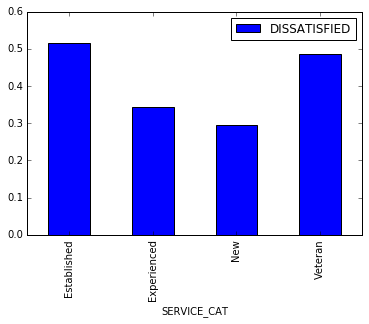

In [26]:
#Use the DataFrame.pivot_table() method to calculate the percentage of dissatisfied employees in each service_cat group.
pivot = pd.pivot_table(combined_updated, index ='SERVICE_CAT', values='DISSATISFIED')

#Use the DataFrame.plot() method to plot the results. Set the kind parameter equal to bar to create a bar chart
%matplotlib inline
pivot.plot(kind='bar')

From the initial analysis above, we can tentatively conclude that employees with 7 or more years of service are more likely to resign due to some kind of dissatisfaction with the job than employees with less than 7 years of service. 